## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer

## Initialise viewer object
If making multiple models it is better to use the same viewer object and use the `clear()` method to prevent errors with lavavu.

In [2]:
view = LavaVuModelViewer()

2021-02-15 09:03:15,697 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-02-15 09:03:15,697 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.


## Define helper function
An object for painting the z coordinate of an object in the viewer

In [3]:
class zfeature:
    def __init__(self):
        self.name = 'Z'
    def evaluate_value(self,xyz):
#         print(xyz)
        return model.rescale(xyz)[:,2]
zpainter = zfeature()

## Create data

In [4]:
xmin = 0
xmax = 5
ymin = 0
ymax = 5
nsteps = (10,10)
xx,yy = np.meshgrid(np.linspace(xmin,xmax,nsteps[0]),np.linspace(ymin,ymax,nsteps[1]))
zz1 = np.random.random(xx.shape)
vv = np.zeros(zz1.shape)
zz2 = np.zeros(xx.shape)+4
pts = np.vstack([
    np.vstack([xx.flatten(),yy.flatten(),zz1.flatten(),vv.flatten()]).T,
    np.vstack([xx.flatten(),yy.flatten(),zz2.flatten(),vv.flatten()+4]).T,
])
# data = pd.DataFrame()
print(pts.shape)

(200, 4)


In [5]:
data = pd.DataFrame(pts,columns=['X','Y','Z','val'])
data['nx'] = np.nan
data['ny'] = np.nan
data['nz'] = np.nan
data.loc[len(data),['X','Y','Z','nx','ny','nz']] = [2,2,4,0,0,1]

In [6]:
data['feature_name'] = 'test'

## Initialise geological model

In [7]:
bb=np.zeros((3,2))
bb[:,1] = 5.1
bb[:,0] = -.1
model = GeologicalModel(bb[:,0],bb[:,1])
model.set_model_data(data)
model.create_and_add_foliation('test',interpolatortype='PLI',solver='pyamg')

In [8]:
model.create_and_add_foliation('test',interpolatortype='PLI',solver='pyamg')
view.model = model 




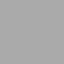

In [9]:
view.interactive()
view.clear()
view.add_data(model.features[0])
view.add_isosurface(model.features[0],slices=[0,4],paint_with=zpainter,cmap='rainbow')

## Run model for multiple interpolators

In [10]:
images = []
view.clear()
view.model=model
# view.add_isosurface(model.features[0],slices=[0,4],cmap='viridis',paint_with=model.features[0])
view.add_data(model.features[0],cmap='rainbow')
view.rotation = [-67.69232940673828, 25.18480110168457, 8.032236099243164]
images.append(view.image_array())
view.add_isosurface(model.features[0],slices=[0,4],cmap='rainbow',paint_with=zpainter)
images.append(view.image_array())
model.create_and_add_foliation('test',interpolatortype='surfe',solver='pyamg',)
view.clear()

view.model=model
# view.add_isosurface(model.features[0],slices=[0,4],cmap='viridis',paint_with=model.features[0])
view.add_data(model.features[0],cmap='rainbow')
view.rotation = [-67.69232940673828, 25.18480110168457, 8.032236099243164]
view.add_isosurface(model.features[0],slices=[0,4],cmap='rainbow',paint_with=zpainter)
images.append(view.image_array())

model.create_and_add_foliation('test',interpolatortype='FDI',solver='pyamg')
view.clear()

view.model=model
# view.add_isosurface(model.features[0],slices=[0,4],cmap='viridis',paint_with=model.features[0])
view.add_data(model.features[0],cmap='rainbow')
view.rotation = [-67.69232940673828, 25.18480110168457, 8.032236099243164]
view.add_isosurface(model.features[0],slices=[0,4],cmap='rainbow',paint_with=zpainter)
images.append(view.image_array())

2021-02-15 09:03:34,433 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Cannot import Surfe, try another interpolator
2021-02-15 09:03:34,433 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Cannot import Surfe, try another interpolator


ImportError: 

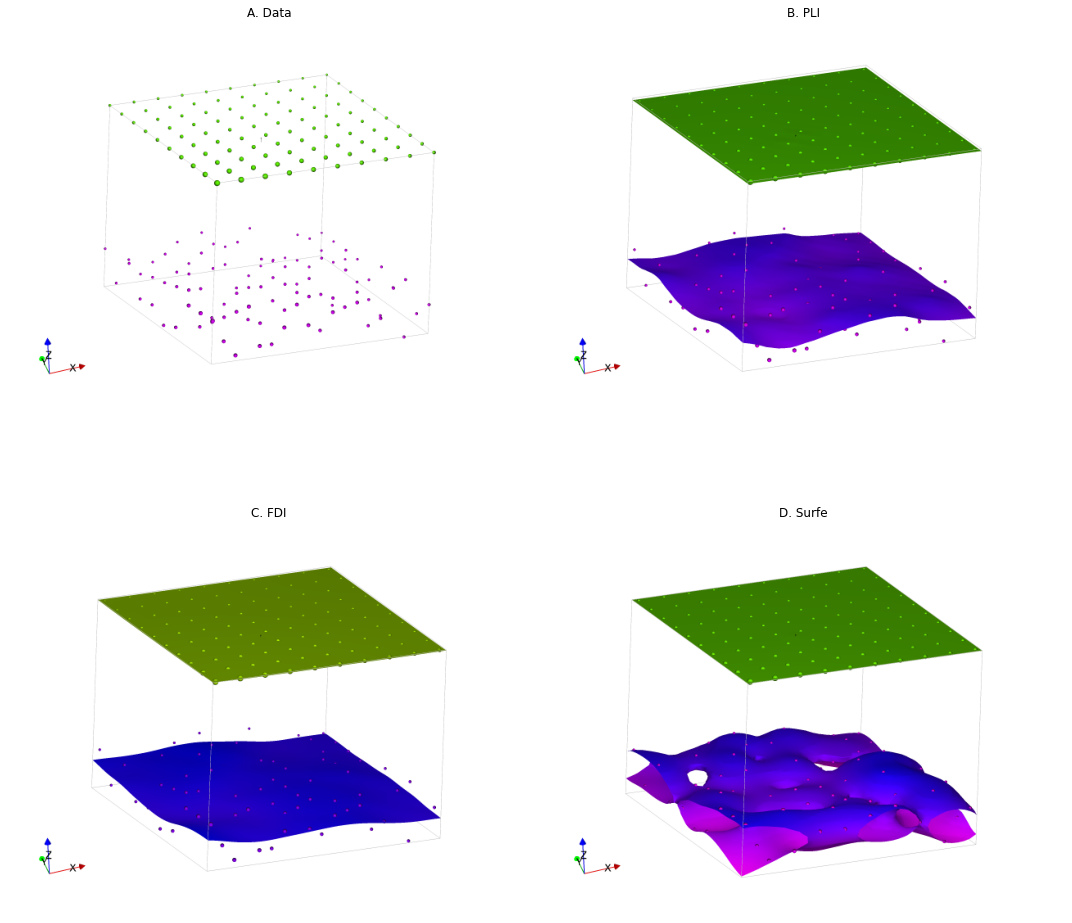

In [11]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
ax[0][0].imshow(images[0])
ax[0][0].set_title('A. Data')
ax[0][1].imshow(images[1])
ax[0][1].set_title('B. PLI')

ax[1][0].imshow(images[3])
ax[1][0].set_title('C. FDI')

ax[1][1].imshow(images[2])
ax[1][1].set_title('D. Surfe')
for i in range(2):
    for j in range(2):
        ax[i][j].axis('off')
plt.tight_layout()

In [12]:
model.features[0].interpolator.c

array([ 2.99100890e-06, -1.29876167e+00, -1.27671743e+00, ...,
        6.79673842e+00,  6.79415958e+00,  2.04909850e-06])

In [13]:
model.features[0].interpolator

### Run for multiple regularisation values

In [14]:
images = {}
images['PLI'] = {}
images['FDI'] = {}
for interpolator  in images.keys():
    for regularisation in [0.1,0.5,1,1.5]:
        view.clear()
        view.model=model
        view.add_data(model.features[0],cmap='viridis')
        model.create_and_add_foliation('test',
                                       interpolatortype=interpolator,
                                       regularisation=regularisation,
                                       solver='pyamg',)
        view.add_isosurface(model.features[0],slices=[0,4],cmap='rainbow',paint_with=zpainter)
        view.rotation = [-67.69232940673828, 25.18480110168457, 8.032236099243164]
        images[interpolator][regularisation] = view.image_array()


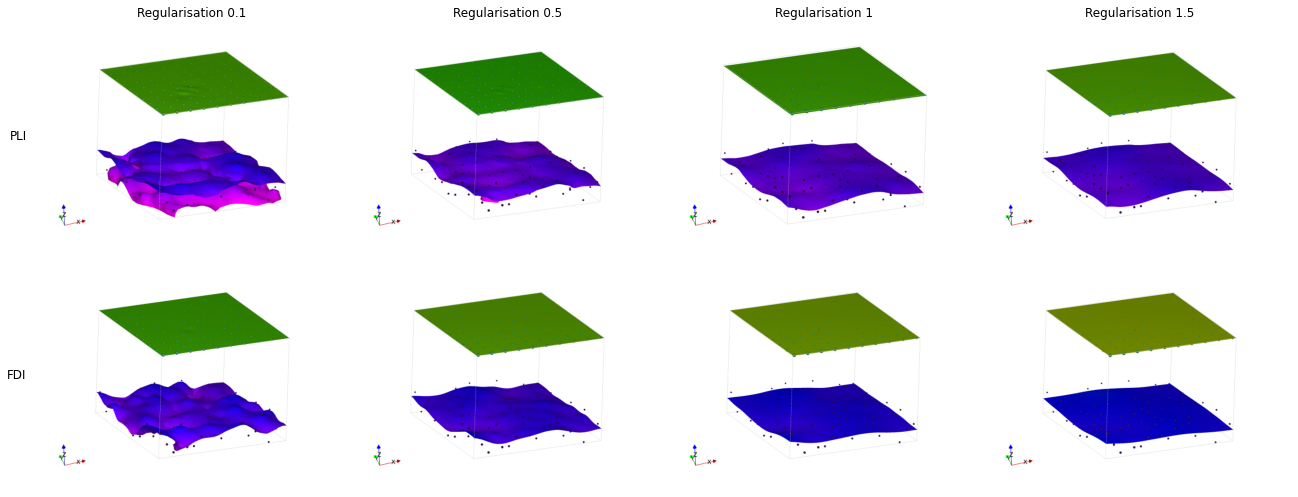

In [15]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy


cols = ['Regularisation {}'.format(col) for col in images['PLI'].keys()]
rows = ['{}'.format(row) for row in ['PLI', 'FDI']]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(21, 7))
# plt.setp(axes.flat, xlabel='X-label', ylabel='Y-label')
i=0
for k, v in images['PLI'].items():
    axes[0,i].get_xaxis().set_ticks([])
    axes[0,i].get_yaxis().set_ticks([])
    axes[0,i].spines['top'].set_visible(False)
    axes[0,i].spines['right'].set_visible(False)
    axes[0,i].spines['bottom'].set_visible(False)
    axes[0,i].spines['left'].set_visible(False)
    axes[0,i].imshow(v)
#     axes[0,i].axis('off')
#     ax[0,i].set_title('Regularisation {}'.format(k),size='xx-large')
    i+=1

i = 0
for k, v in images['FDI'].items():
    axes[1,i].get_xaxis().set_ticks([])
    axes[1,i].get_yaxis().set_ticks([])
    axes[1,i].spines['top'].set_visible(False)
    axes[1,i].spines['right'].set_visible(False)
    axes[1,i].spines['bottom'].set_visible(False)
    axes[1,i].spines['left'].set_visible(False)
    axes[1,i].imshow(v)
#     axes[1,i].axis('off')

    i+=1
pad = 5 # in points

for ax, col in zip(axes[0], cols):
    
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.15, top=0.95)

plt.show()